###### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. Hence, the company has decided to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes wants to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Business Goal

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
3. Develop a model  showcasing the demand for shared bikes with the available independent variables. It will be used by the    management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [931]:
#Import the basic python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [838]:
#suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [839]:
#import Scikit Learn Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [840]:
#import Statsmodel libraries
import statsmodels.api as sm

In [841]:
#reading the dataset
bike_sharing = pd.read_csv('day.csv')

In [842]:
#checking the first few columns of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [843]:
#checking the number of rows and columns present in the dataset

bike_sharing.shape

(730, 16)

In [844]:
#checking the names of the columns present in the dataset
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [845]:
#checking the statistical values of the Dataset
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [846]:
#Looking for the Non-Null count and datatype present in the Dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [847]:
#checking for the count of Null values in the Dataset
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [848]:
#describing the column 'dteday'
bike_sharing['dteday'].describe()

count            730
unique           730
top       14-09-2018
freq               1
Name: dteday, dtype: object

<Figure size 2160x1440 with 0 Axes>

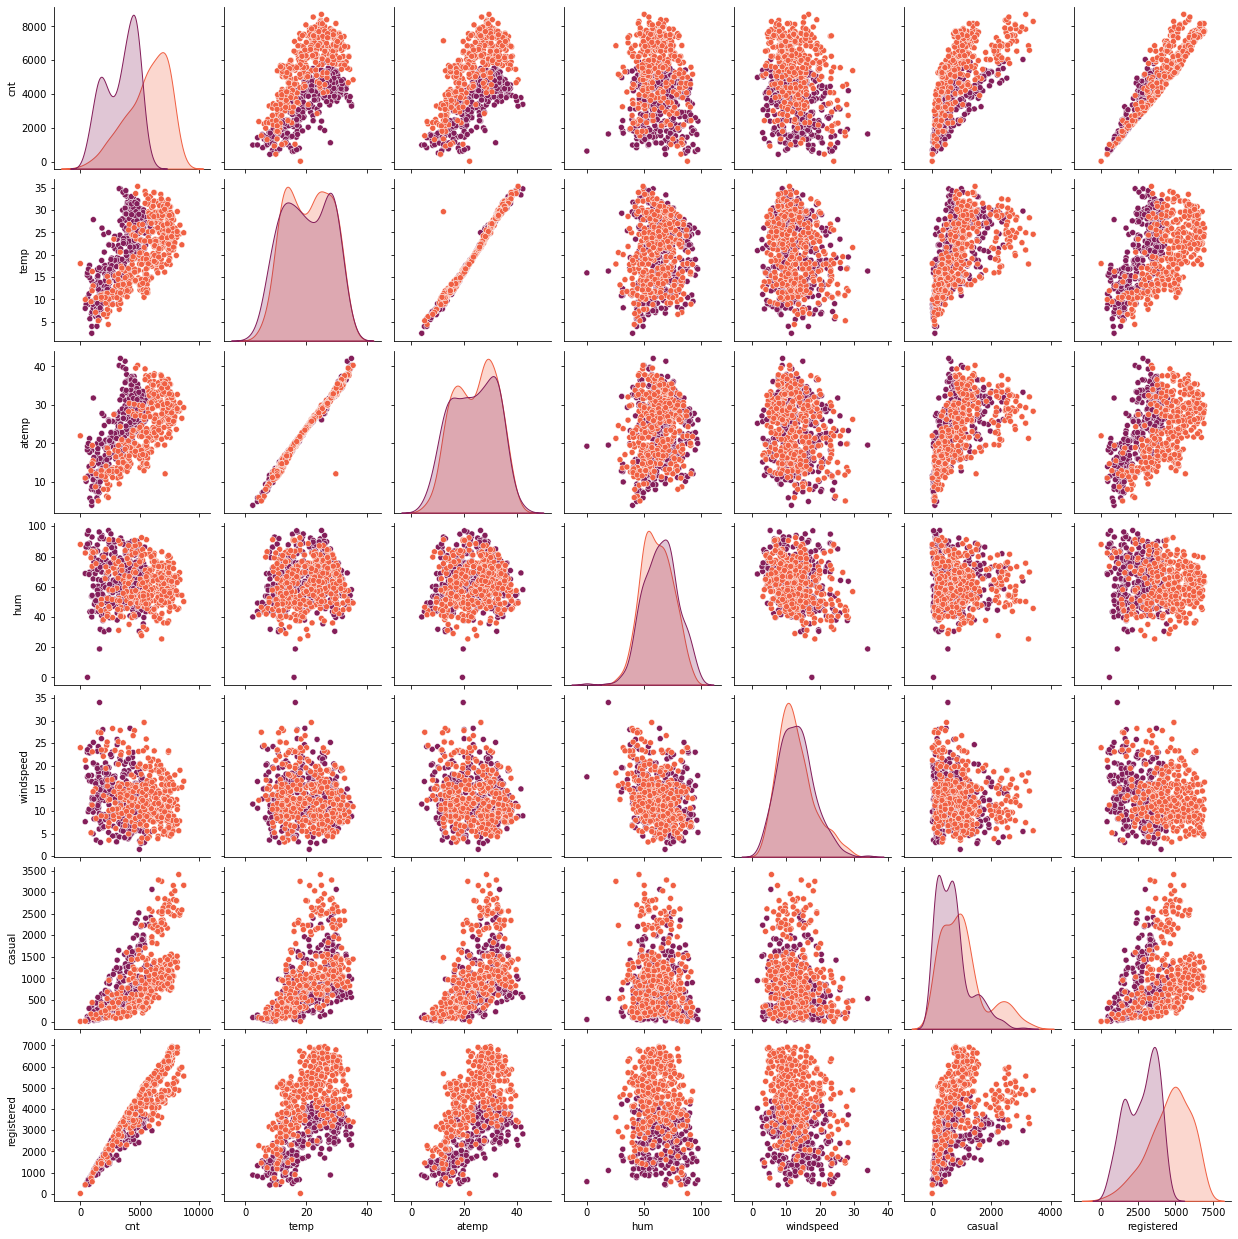

In [933]:
#Visualizing the Data using a pairplot

vis_cols =['cnt','temp','atemp','hum','windspeed','casual','registered']
plt.figure(figsize = (30,20))
plt.suptitle("Bike Sharing - Numerical Variables using Pairplot")
bs = sns.pairplot(data=bike_sharing,palette='rocket',vars=vis_cols,hue='yr')
bs._legend.remove()
plt.show()

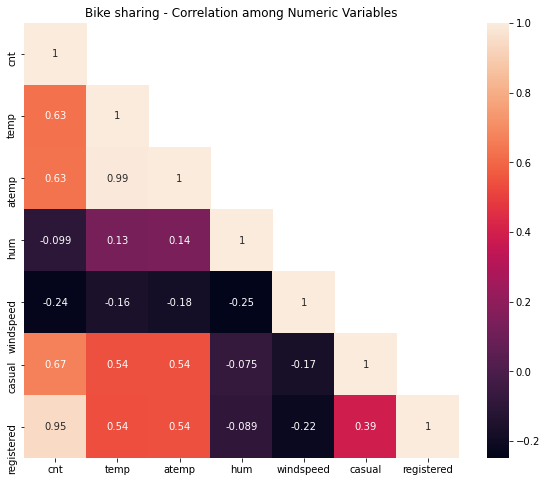

In [934]:
#Creating heatmap to reflect the correlation among the variables.

plt.figure(figsize=(10,8))
plt.title('Bike sharing - Correlation among Numeric Variables')
corr_bs= bike_sharing[vis_cols].corr()
mask=np.array(corr_bs)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_bs, mask=mask,square=True,annot=True)
plt.show()

In [851]:
# finding top 5 highly correlated numeric variables
round(corr_bs,2).unstack().sort_values(ascending=False).drop_duplicates().head(5)

cnt         cnt     1.00
atemp       temp    0.99
registered  cnt     0.95
casual      cnt     0.67
cnt         temp    0.63
dtype: float64

### Visualizing Categorical Variables

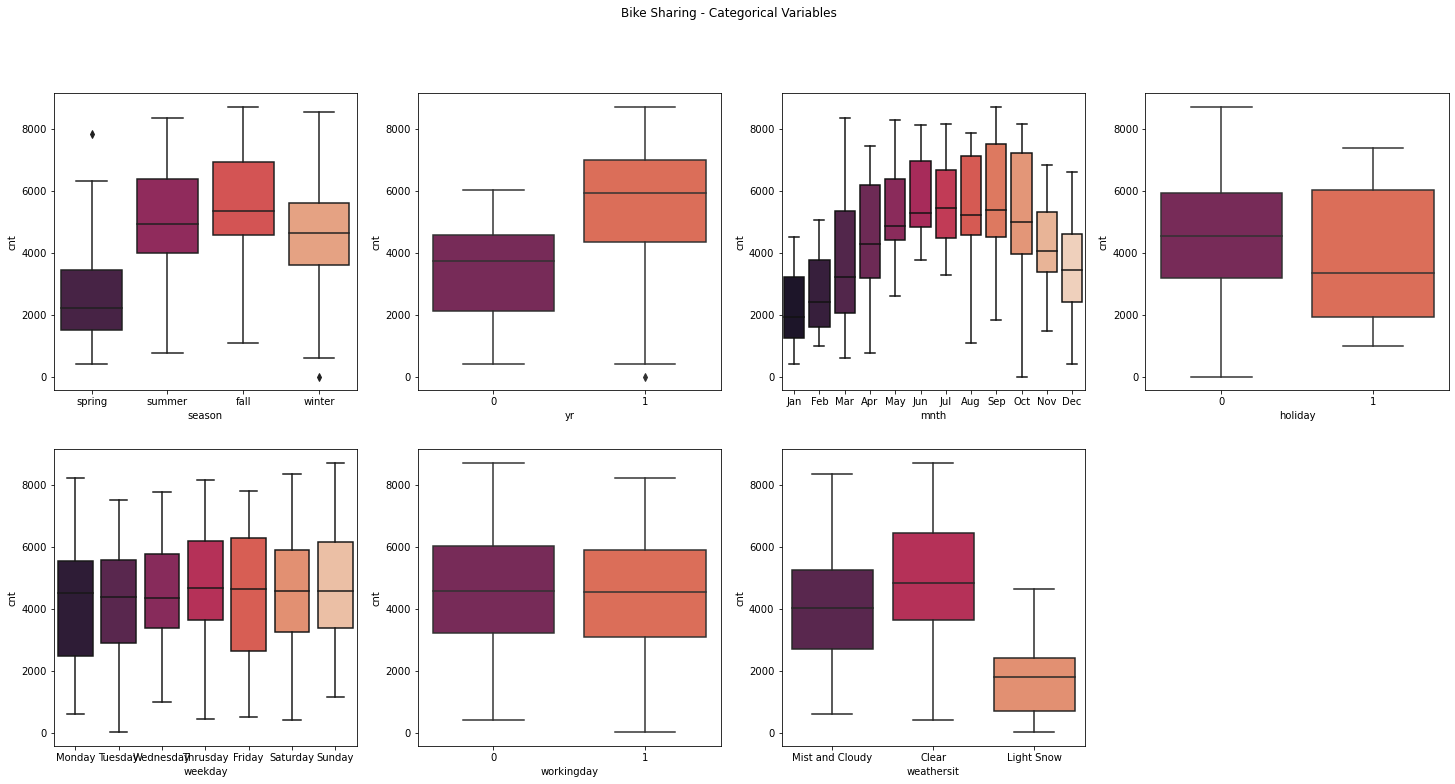

In [935]:
#Using boxplot inside subplots to display the Categorical Variables

plt.figure(figsize=(25, 12))
plt.suptitle("Bike Sharing - Categorical Variables")
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing,palette='rocket')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing,palette='rocket')
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing,palette='rocket')
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing,palette='rocket')
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing,palette='rocket')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing,palette='rocket')
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing,palette='rocket')
plt.show()

###### Following are the inferences drawn:
    
a. Effect of ‘weathersit’ variable on the Target Variable ‘cnt’, there is an increase in demand during the ‘clear’ weather with the least during ‘Light Snow’ weather.
b. Effect of ‘season’ variable on the Target variable ‘cnt’, there is an increase in demand during fall season with the drop in demand during ‘Spring’ Season.
c. In 2019, there is an increase of demand in the ‘yr’ variable as compared to 2018 as it is having a higher median as compared to 2018.
d. From the Month of May, there is an increase in Sales, probable case may be Holidays.

### Preparation of Data

In [853]:
#Making a separate dataset 
bike_eval = bike_sharing

In [854]:
# Converting season column to give proper category
bike_eval['season'] = bike_eval['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [855]:
bike_eval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [856]:
#value count of the categories present in 'season' column
bike_eval['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [857]:
#Converting 'mnth' column 
bike_eval['mnth'] = bike_eval['mnth'].apply(lambda x:datetime.date(1900, x , 1).strftime('%b'))

In [858]:
#value count of the categories present in 'mnth' column
bike_eval['mnth'].value_counts()

Mar    62
May    62
Oct    62
Dec    62
Jan    62
Aug    62
Jul    62
Sep    60
Nov    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [859]:
#checking the value count of the field 'holiday'

bike_eval['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [860]:
#converting column weekday to corresponding days using map function

bike_eval['weekday'] = bike_eval['weekday'].map({0 : "Sunday", 1 : "Monday", 2 : "Tuesday", 3 : "Wednesday", 4: "Thrusday", 5: "Friday", 6: "Saturday"})


In [861]:
#checking the value count of 'workingday' column 
bike_eval['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [862]:
#converting 'weathersit' column to give proper category 
bike_eval['weathersit'] = bike_eval['weathersit'].map({1 : "Clear", 2 : "Mist and Cloudy", 3 : "Light Snow", 4 : "Heavy Rain"})

In [863]:
#checking the value count of 'weathersit' column 
bike_eval['weathersit'].value_counts()

Clear              463
Mist and Cloudy    246
Light Snow          21
Name: weathersit, dtype: int64

In [864]:
#Converting bikeval to datetime
bike_eval['dteday'] = pd.to_datetime(bike_eval['dteday'])
bike_eval['day'] = bike_eval['dteday'].dt.day

In [865]:
#checking the first few columns of the Dataset
bike_eval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,2018-04-01,spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [866]:
#checking the info of Bike_eval dataset
bike_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
 16  day         730 non-null  

In [867]:
#Creating Dummy Variables using the Categorical variables

dummy_col = pd.get_dummies(bike_eval[['season','mnth','weekday','weathersit']], drop_first = True)

#Concatenating dummy column to the original dataset

bike_eval = pd.concat([bike_eval, dummy_col], axis = 1) 

In [868]:
#checking the first few columns of the dataset
bike_eval.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,2018-01-01,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,spring,0,Jan,0,Thrusday,1,Clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [869]:
# droping the columns as it is already added in the Dummy Dataset

bike_eval = bike_eval.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [870]:
bike_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   instant                     730 non-null    int64         
 1   dteday                      730 non-null    datetime64[ns]
 2   yr                          730 non-null    int64         
 3   holiday                     730 non-null    int64         
 4   workingday                  730 non-null    int64         
 5   temp                        730 non-null    float64       
 6   atemp                       730 non-null    float64       
 7   hum                         730 non-null    float64       
 8   windspeed                   730 non-null    float64       
 9   casual                      730 non-null    int64         
 10  registered                  730 non-null    int64         
 11  cnt                         730 non-null    int64         

In [871]:
# Dropping columns casual and registered as it is not required anymore
bike_eval.drop(['casual','registered'], axis = 1, inplace = True)

In [872]:
#Also dropping 'atemp' fields as its facing multicollinearity
bike_eval.drop(['atemp'], axis = 1, inplace = True)

In [873]:
#Dropping 'dteday'
bike_eval.drop(['dteday'], axis = 1, inplace = True)

In [874]:
#checking the dataset of bike_eval
bike_eval

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,0,0,1,14.110847,80.5833,10.749882,985,1,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,0,1,10.420847,65.2917,23.458911,2114,27,1,...,0,0,0,0,0,0,0,0,0,1
726,727,1,0,0,10.386653,59.0000,10.416557,3095,28,1,...,0,0,0,1,0,0,0,0,0,1
727,728,1,0,0,10.386653,75.2917,8.333661,1341,29,1,...,0,0,0,0,1,0,0,0,0,1
728,729,1,0,1,10.489153,48.3333,23.500518,1796,30,1,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the Data into Train Set and Test Set

In [875]:
#Preparing the Data for model using X and y

X = bike_eval.drop('cnt',axis = 1)
y = bike_eval.cnt

In [876]:
#checking the first few columns of the dataset
X.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,0,0,1,14.110847,80.5833,10.749882,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,69.6087,16.652113,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [877]:
#Creating Train and Test Set

train_X, test_X, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state = 0)

In [878]:
#checking the number of rows and columns in Train_X
train_X.shape

(584, 30)

In [879]:
#checking the number of rows and column in y_train
y_train.shape

(584,)

In [880]:
#creating a dataset containing the numerical feature variables present in the dataset of train_X
numerical_feat  = list(train_X.describe().columns)
numerical_feat

['instant',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'day',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thrusday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'weathersit_Light Snow',
 'weathersit_Mist and Cloudy']

In [881]:
#Using standard Scaling for Numerical Feature Variables

sc = StandardScaler()
train_X[numerical_feat] = sc.fit_transform(train_X[numerical_feat])
test_X[numerical_feat] = sc.transform(test_X[numerical_feat])

In [882]:
train_X.describe()

,instant,yr,holiday,workingday,temp,hum,windspeed,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
count,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,...,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02
mean,-6.691755e-17,-3.269835e-17,-1.411542e-16,-1.939088e-16,-2.015131e-17,-5.275460e-16,-1.333123e-16,7.511590e-17,-1.163453e-16,1.825024e-17,...,-2.851600e-18,-3.176683e-16,6.083414e-18,1.041785e-16,6.216489e-17,-5.132880e-18,3.745102e-17,3.593016e-17,-7.480698e-17,3.726091e-17
std,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,...,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00
min,-1.715348e+00,-9.897783e-01,-1.678363e-01,-1.504184e+00,-2.354214e+00,-2.654964e+00,-1.929081e+00,-1.673829e+00,-5.588914e-01,-5.931710e-01,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,-7.107423e-01
25%,-8.805219e-01,-9.897783e-01,-1.678363e-01,-1.504184e+00,-8.696536e-01,-7.678232e-01,-7.201760e-01,-8.669173e-01,-5.588914e-01,-5.931710e-01,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,-7.107423e-01
50%,-7.909751e-03,-9.897783e-01,-1.678363e-01,6.648122e-01,-3.569099e-02,-1.769106e-02,-1.196691e-01,-6.000521e-02,-5.588914e-01,-5.931710e-01,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,-7.107423e-01
75%,8.599792e-01,1.010327e+00,-1.678363e-01,6.648122e-01,8.911855e-01,7.204172e-01,5.654426e-01,8.621801e-01,-5.588914e-01,1.685854e+00,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,1.406980e+00
max,1.727868e+00,1.010327e+00,5.958188e+00,6.648122e-01,2.010694e+00,2.470922e+00,3.280550e+00,1.784365e+00,1.789257e+00,1.685854e+00,...,3.165260e+00,3.639217e+00,2.474258e+00,2.456857e+00,2.456857e+00,2.358346e+00,2.439750e+00,2.528321e+00,6.380775e+00,1.406980e+00


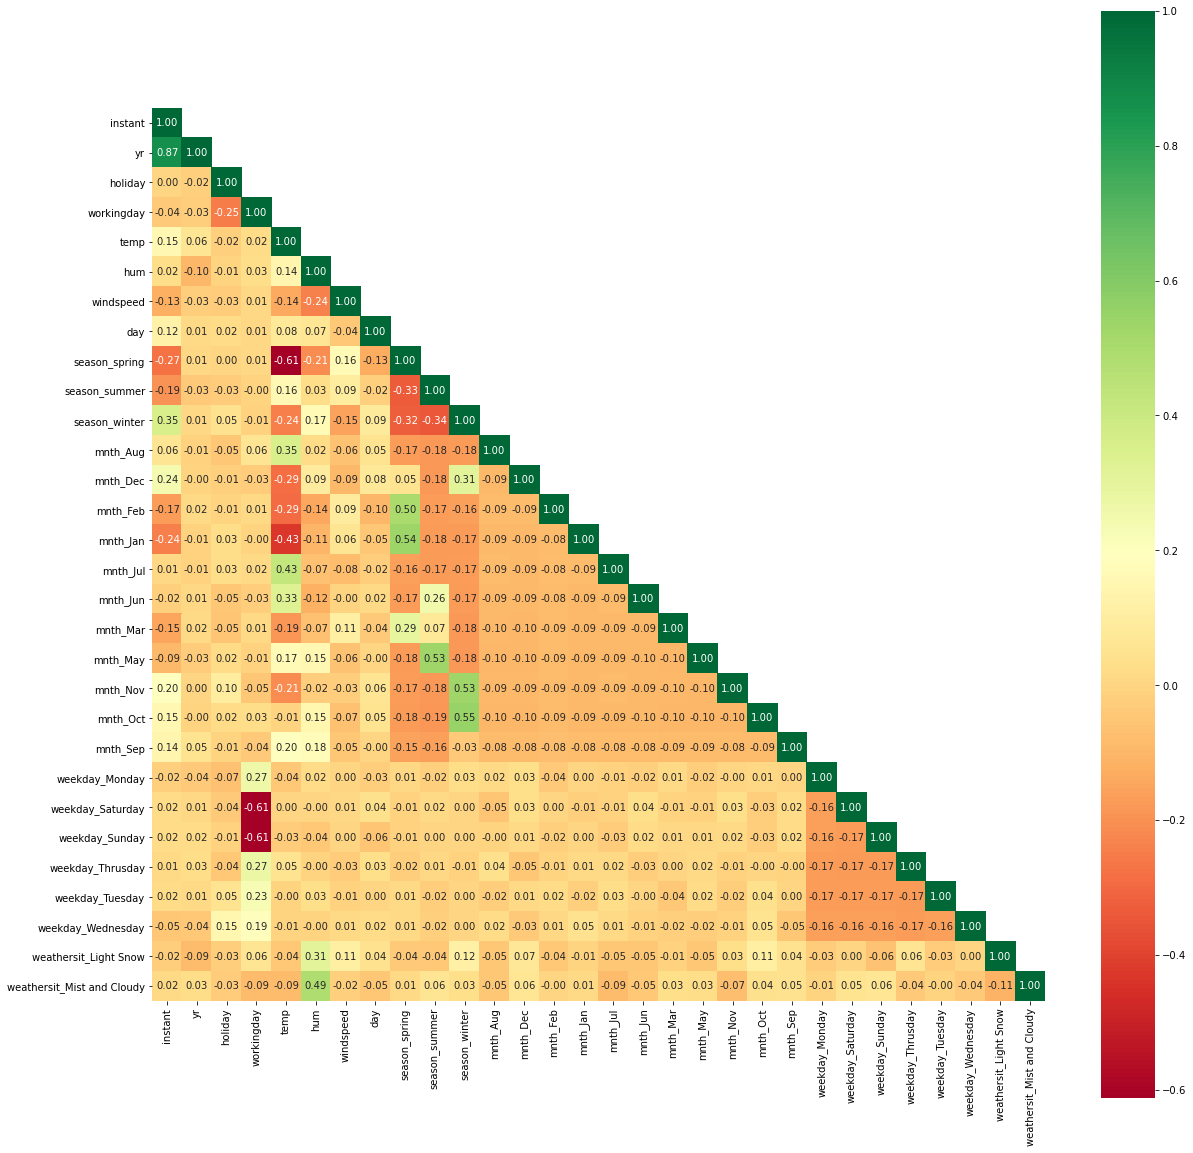

In [936]:
#checking the Correlation of the Dataset of train_X
plt.figure(figsize = (20,20))
corr_X= train_X.corr()
mask=np.array(corr_X)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_X, mask=mask,cmap = "RdYlGn",square=True,annot=True,fmt=".2f")
plt.show()

In [884]:
#Now we will be creating and performing Linear Regression on the Train Dataset

lr = LinearRegression()
lr.fit(train_X,y_train)

LinearRegression()

In [885]:
#Getting all the values of Coefficients using Linear Regression method

coef_lr = pd.DataFrame(lr.coef_,X.columns, columns = ['Coefficients'])
coef_lr

,Coefficients
instant,-3037.427255
yr,3585.611753
holiday,-154.734744
workingday,-277.386422
temp,873.543319
hum,-245.736471
windspeed,-234.974201
day,59.322888
season_spring,-354.336351
season_summer,19.850736


In [886]:
#checking the value of intercept of the Train Data set
lr.intercept_

4492.518835616437

In [887]:
#Finding  predicted Value of Y using the test set of X

pred_y = lr.predict(test_X)

In [888]:
#comparing the value of Original Y and Predicted Y value
linear_value_bs = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : pred_y
})

In [889]:
linear_value_bs

,Actual,Predicted
196,5923,4036.039284
187,4592,4758.115009
14,1248,1128.246158
31,1360,1152.378748
390,4075,3599.005905
...,...,...
118,4595,4294.782426
566,4459,3600.110916
688,5634,5061.259062
266,5423,4763.238871


### R2_Score Verification

In [890]:
#Performig r2_score on the test dataset
r2_score(y_test,pred_y)

0.869323733367138

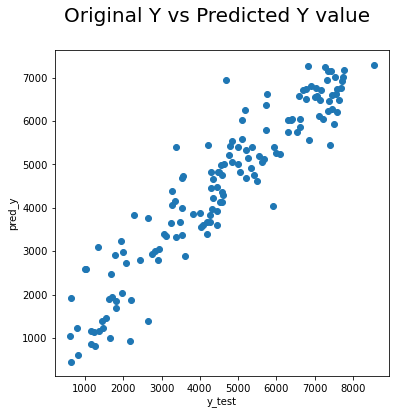

In [938]:
#Vizualizing the data using Scatter Plot for y_test and pred_y

plt.figure(figsize = (6,6))
plt.scatter(y_test, pred_y)
plt.suptitle('Original Y vs Predicted Y value', fontsize=20)              
plt.xlabel('y_test', fontsize=10)                          
plt.ylabel('pred_y', fontsize=10)                          
plt.show()

In [892]:
#Now we will be performing Residual Analysis of Train Data Set

train_y_cnt = lr.predict(train_X)

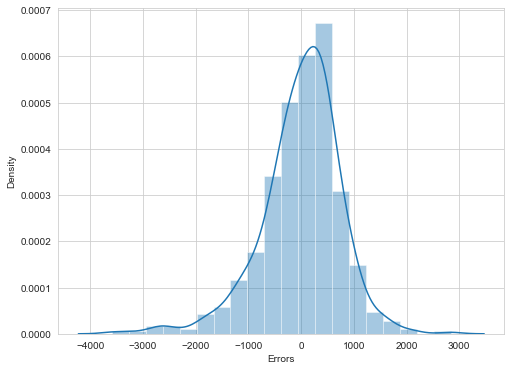

In [941]:
#Using Distplot to showcase the Error terms present in the Dataset
plt.figure(figsize = (8,6))
sns.set_style('whitegrid')
sns.distplot((y_train - train_y_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)  
plt.show()

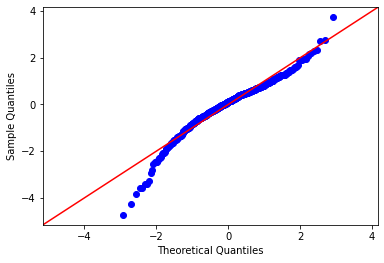

In [894]:
#performing QQ plot to showcase whether it is having same set of distribution
sm.qqplot((y_train - train_y_cnt), fit=True, line='45')
plt.show()

### Building Linear Model using Statsmodel, for indepth analysis

In [895]:
#Preparing Train and Test Dataset using the original dataset

bs_train, bs_test = train_test_split(bike_eval, train_size = 0.7, test_size = 0.3, random_state = 100)


In [896]:
#creating the dataset containing all the numerical columns present in the Dataset
numerical_cols = list(bs_train.describe().columns)
numerical_cols

['instant',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'day',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thrusday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'weathersit_Light Snow',
 'weathersit_Mist and Cloudy']

In [897]:
#Using Standard Scaler on Train and Test set of Numerical Variables

sc_new = StandardScaler()
bs_train[numerical_cols] = sc_new.fit_transform(bs_train[numerical_cols])
bs_test[numerical_cols] = sc_new.transform(bs_test[numerical_cols])

In [898]:
bs_test

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
184,-0.877319,-1.015811,6.183104,-1.571429,1.305371,0.047995,-1.394498,0.798166,-0.979311,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,1.383577
535,0.796798,0.984435,-0.161731,0.636364,1.613721,-0.276087,-0.984730,0.884309,0.492319,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,2.446692,-0.424918,-0.395554,-0.174078,-0.722764
299,-0.328819,-1.015811,-0.161731,-1.571429,-0.112129,1.285378,0.079219,-0.937002,1.284735,-0.566783,...,3.254368,-0.295669,-0.428129,2.593699,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,1.383577
221,-0.700845,-1.015811,-0.161731,0.636364,1.526280,-1.463381,0.110839,0.150554,-0.866108,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
152,-1.029945,-1.015811,-0.161731,-1.571429,1.240938,-2.305983,1.277165,0.246953,-1.092513,-0.566783,...,-0.307279,-0.295669,-0.428129,2.593699,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.152907,0.984435,-0.161731,0.636364,-1.239685,0.401533,-0.196644,-0.789328,-1.545322,1.764342,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,2.353394,-0.395554,-0.174078,1.383577
702,1.593315,0.984435,-0.161731,0.636364,-0.079915,0.725607,-0.220305,1.086847,-0.413299,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,-0.722764
127,-1.149184,-1.015811,-0.161731,0.636364,0.210028,0.003802,-1.481206,-0.078648,-1.205715,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,2.353394,-0.395554,-0.174078,-0.722764
640,1.297602,0.984435,-0.161731,0.636364,0.923381,1.149853,-1.583756,1.582170,-0.639704,-0.566783,...,3.254368,-0.295669,-0.428129,-0.385550,-0.398862,2.446692,-0.424918,-0.395554,-0.174078,1.383577


In [899]:
#removing 'cnt' column from the dataset
y_train_new = bs_train.pop('cnt')
X_train_new = bs_train

In [900]:
X_train_new

,instant,yr,holiday,workingday,temp,hum,windspeed,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
653,1.359606,0.984435,-0.161731,0.636364,-0.121335,-0.514725,-0.117752,0.039510,-0.566783,-0.569803,...,3.254368,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,-0.722764
576,0.992350,0.984435,-0.161731,0.636364,1.231731,0.516433,-0.330615,1.737544,-0.566783,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,-0.722764
426,0.276915,0.984435,-0.161731,-1.571429,-0.420478,-0.069854,-0.385694,-1.432120,1.764342,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,2.507133,-0.408715,-0.424918,-0.395554,-0.174078,1.383577
728,1.717324,0.984435,-0.161731,0.636364,-1.294913,-1.045032,2.018143,1.624342,1.764342,-0.569803,...,-0.307279,-0.295669,2.335743,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
482,0.544011,0.984435,-0.161731,-1.571429,-0.627580,-1.000840,-0.779889,1.397937,-0.566783,1.754993,...,-0.307279,-0.295669,-0.428129,-0.38555,2.507133,-0.408715,-0.424918,-0.395554,-0.174078,1.383577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.753872,0.984435,-0.161731,0.636364,1.273152,-0.305544,0.205320,-1.092513,-0.566783,1.754993,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,2.353394,-0.395554,-0.174078,1.383577
578,1.001889,0.984435,-0.161731,0.636364,1.448040,0.201190,-0.787759,-0.866108,-0.566783,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
53,-1.502132,-1.015811,-0.161731,0.636364,-1.483204,-1.471329,-1.234384,0.831926,1.764342,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
350,-0.085572,-1.015811,-0.161731,0.636364,-1.281106,-0.497048,0.654645,0.152712,-0.566783,-0.569803,...,-0.307279,-0.295669,2.335743,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,1.383577


## Step 2: RFE : Recursive Feature Elimination

In [901]:
#performing recursive feature elimination on the train dataset
lm = LinearRegression()
rfe_bs = RFE(lm,15)
rfe_bs = rfe_bs.fit(X_train_new,y_train_new)

In [902]:
list(zip(X_train_new.columns,rfe_bs.support_,rfe_bs.ranking_))

[('instant', False, 9),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 13),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 16),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 4),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

In [903]:
#segregating the X_train_new columns derived through RFE
cols_bs = X_train_new.columns[rfe_bs.support_]
cols_bs

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [904]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   instant                     510 non-null    float64
 1   yr                          510 non-null    float64
 2   holiday                     510 non-null    float64
 3   workingday                  510 non-null    float64
 4   temp                        510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   day                         510 non-null    float64
 8   season_spring               510 non-null    float64
 9   season_summer               510 non-null    float64
 10  season_winter               510 non-null    float64
 11  mnth_Aug                    510 non-null    float64
 12  mnth_Dec                    510 non-null    float64
 13  mnth_Feb                    510 no

### 3. Model Building

#### Model 1

In [905]:
# Creating X test frame with RFE variables

X_train_model1 = X_train_new[cols_bs]

In [906]:
#We will be adding another column to equalize the model
X_train_model1 = sm.add_constant(X_train_model1)

In [907]:
#Now we will perfom OLS on the new model
lm_statsmodel1 = sm.OLS(y_train_new,X_train_model1).fit()

In [908]:
#print Statsmodel summary 

print(lm_statsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.34e-189
Time:                        19:15:47   Log-Likelihood:                -247.45
No. Observations:                 510   AIC:                             526.9
Df Residuals:                     494   BIC:                             594.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

###### Here we can notice:
1. R-Squared : 0.845
2. Adjusted R-Squared : 0.841

In [909]:
##Checking VIF of model 1 created 

vif_bs = pd.DataFrame()
X = X_train_model1
vif_bs['Features'] = X.columns
vif_bs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_bs['VIF'] = round(vif_bs['VIF'], 2)
vif_bs = vif_bs.sort_values(by = "VIF", ascending = False)
vif_bs

,Features,VIF
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
15,weathersit_Mist and Cloudy,1.57
9,mnth_Dec,1.49
11,mnth_Jul,1.49


In [910]:
#Dropping one column and checking Model as the value is above 5 

X_train_new = X_train_model1.drop(['season_spring'],axis = 1)

### Model 2:

In [911]:
#now we will be creating a new model using train set and adding another column
X_train_model2 = sm.add_constant(X_train_new)

In [912]:
#running Stats Linear Model

lm_statsmodel2 = sm.OLS(y_train_new,X_train_model2).fit()

In [913]:
print(lm_statsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.54e-188
Time:                        19:15:48   Log-Likelihood:                -251.77
No. Observations:                 510   AIC:                             533.5
Df Residuals:                     495   BIC:                             597.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [914]:
#Calcualte the VIF of model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,temp,2.32
7,season_winter,2.08
4,hum,1.90
11,mnth_Nov,1.70
9,mnth_Jan,1.67
14,weathersit_Mist and Cloudy,1.55
8,mnth_Dec,1.47
6,season_summer,1.44
10,mnth_Jul,1.43
13,weathersit_Light Snow,1.25


In [ ]:
Here we can see:
1. All the values of VIF are below 5

### Step 4: Residual Analysis of the Train Data
    

In [915]:
y_train_cnt2 = lm_statsmodel2.predict(X_train_model2)

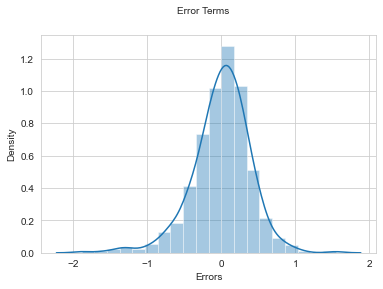

In [943]:
fig = plt.figure()
sns.distplot((y_train_new - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

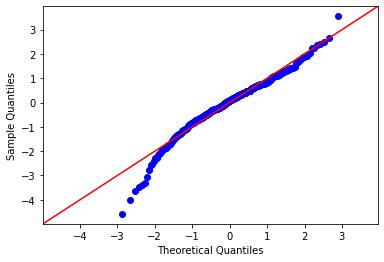

In [917]:
#Perfroming QQ plot to determine whether the two quantiles are having same set of distributions
sm.qqplot((y_train_new - y_train_cnt2), fit=True, line='45')
plt.show()

### Step 5 : Make Predictions

In [918]:
#Create two dataset by removing 'cnt' column
y_test_new = bs_test.pop('cnt')

X_test_new = bs_test

In [919]:
X_test_new.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'day', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [920]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist and Cloudy'],
      dtype='object')

In [921]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist and Cloudy']
X_test_result = X_test_new[cols]

X_test_result = sm.add_constant(X_test_result)

In [922]:
#Performing linear regression using Statsmodel on 'X_test_result' by finding the value of predicted value of Y
y_pred  = lm_statsmodel2.predict(X_test_result)

In [923]:
y_pred.head()

184   -0.532425
535    1.814882
299   -0.437231
221    0.396364
152    0.477245
dtype: float64

### Step 6: Model Evaluation

Text(0, 0.5, 'y_pred')

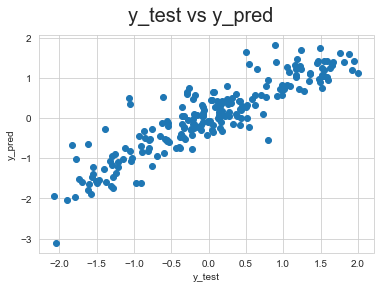

In [944]:
# Plotting y_test and y_pred to understand the spread using Scatter plot
fig = plt.figure()
plt.scatter(y_test_new,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=10)                         
plt.ylabel('y_pred', fontsize=10)  

In [927]:
#R2_Score Verification on the original value and the predicted value

r2_score(y_test_new,y_pred)

0.8086015607554496

In [928]:
#Coefficient of the second model

coef_bs = pd.DataFrame(lm_statsmodel2.params)
coef_bs.columns=['Coef']
coef_bs.round(3)

,Coef
const,-0.000
yr,0.510
holiday,-0.067
temp,0.557
hum,-0.112
windspeed,-0.149
season_summer,0.137
season_winter,0.267
mnth_Dec,-0.039
mnth_Jan,-0.060


### Insights

Following are the inferences:
1. Positive coefficients like yr,temp,season_summer,season_winter,mnth_sept shows that increase in their value increases the value of ‘cnt’ variable.
2. Negative coefficients as in holiday, humidity, windspeed portrays that increase in their value has a negative impact on ‘cnt’ variable thus in their demand.
3. Coefficients like season_summer,season_winter,temp has a higher coefficients which is considered as an important factor of climate.
4. Organization should focus on increasing their demand on ‘Spring’ Season as the demand is very less as compared to other seasons